## Importing the Libraries

In [334]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings('ignore')


## Importing the CSV file

In [261]:
df = pd.read_csv('telescope_data.csv')
df.head()


Unnamed: 0   fLength    fWidth   fSize  ...  fM3Trans   fAlpha     fDist  class
0           0   28.7967   16.0021  2.6449  ...   -8.2027  40.0920   81.8828      g
1           1   31.6036   11.7235  2.5185  ...   -9.9574   6.3609  205.2610      g
2           2  162.0520  136.0310  4.0612  ...  -45.2160  76.9600  256.7880      g
3           3   23.8172    9.5728  2.3385  ...   -7.1513  10.4490  116.7370      g
4           4   75.1362   30.9205  3.1611  ...   21.8393   4.6480  356.4620      g

[5 rows x 12 columns]

## Checking for missing values and Datatype

In [335]:
df_new = df.drop(['Unnamed: 0'], axis = 1)
df_new.columns

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')

In [336]:
df_new.describe()

fLength        fWidth  ...        fAlpha         fDist
count  19020.000000  19020.000000  ...  19020.000000  19020.000000
mean      53.250154     22.180966  ...     27.645707    193.818026
std       42.364855     18.346056  ...     26.103621     74.731787
min        4.283500      0.000000  ...      0.000000      1.282600
25%       24.336000     11.863800  ...      5.547925    142.492250
50%       37.147700     17.139900  ...     17.679500    191.851450
75%       70.122175     24.739475  ...     45.883550    240.563825
max      334.177000    256.382000  ...     90.000000    495.561000

[8 rows x 10 columns]

In [337]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [338]:
df_new.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

## Data Visualization

Box method to visualize the Median of Data

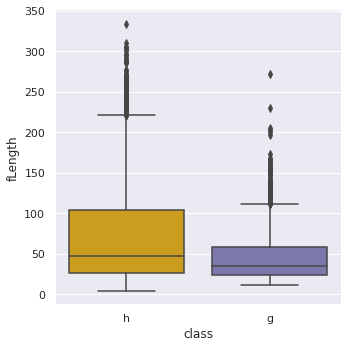

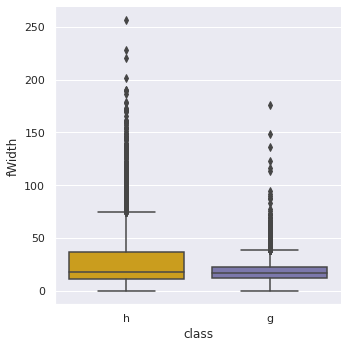

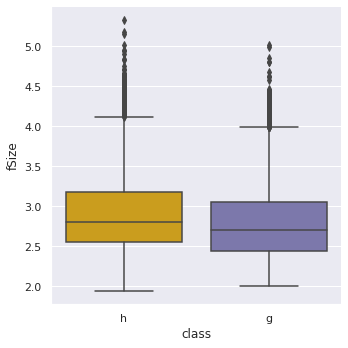

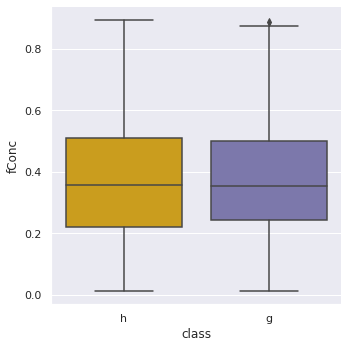

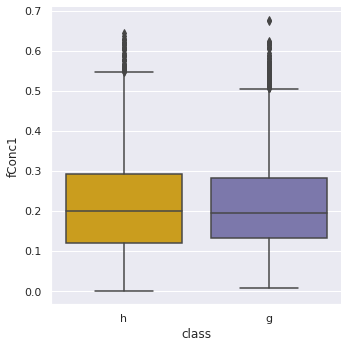

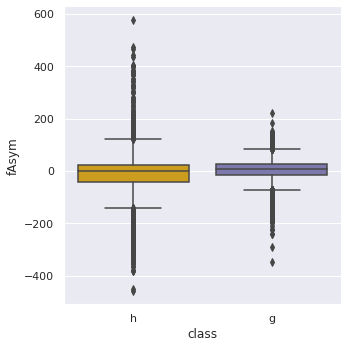

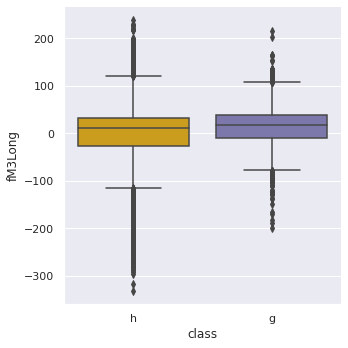

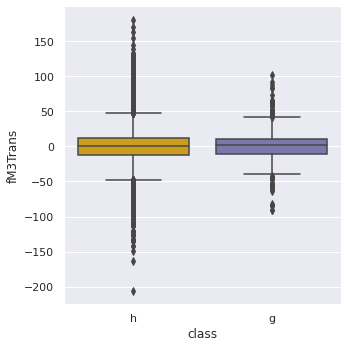

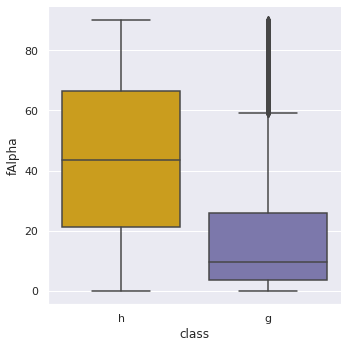

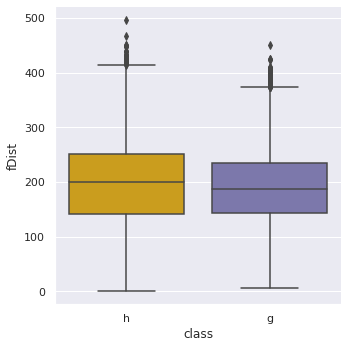

In [339]:
features = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long','fM3Trans', 'fAlpha', 'fDist']
sns.set_style("darkgrid")
for i,t in enumerate(features):
    sns.catplot(y=t, 
                x= "class",
                data=df_new, 
                orient='v', 
                ax=axes[i%2], 
                palette = 'Dark2_r',
                kind = 'box',
                order = ['h','g'],
                height = 5)
plt.show()
    

Violin method to visualize the Median of Data

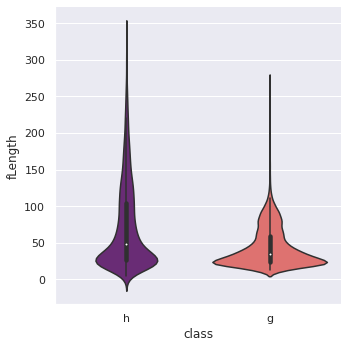

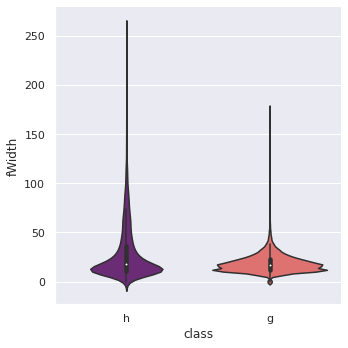

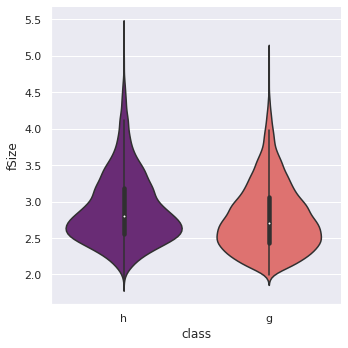

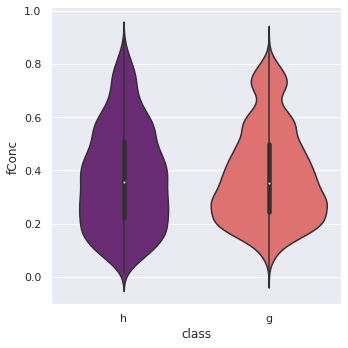

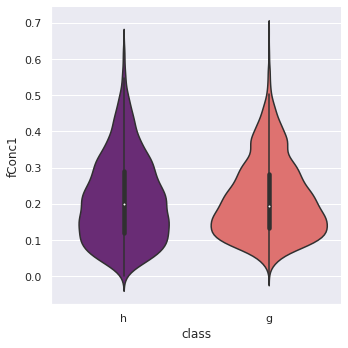

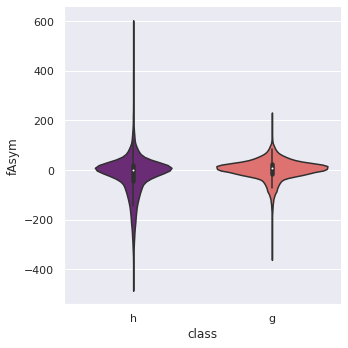

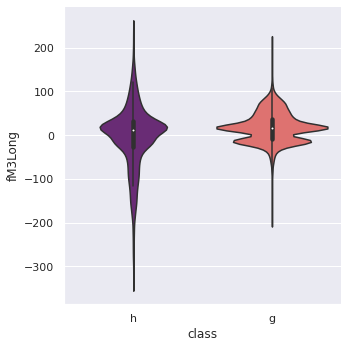

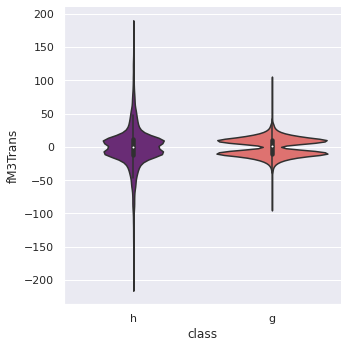

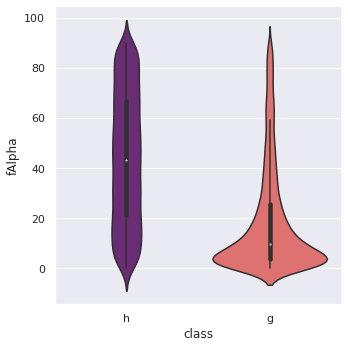

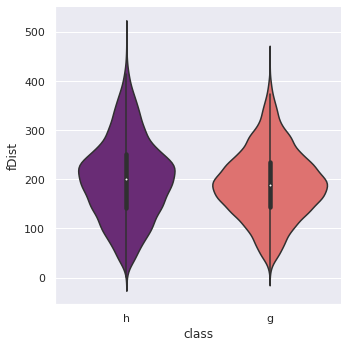

In [340]:
features = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long','fM3Trans', 'fAlpha', 'fDist']
sns.set_style("darkgrid")
for i,t in enumerate(features):
    sns.catplot(y=t, 
                x= "class",
                data=df_new, 
                orient='v', 
                ax=axes[i%2], 
                palette = 'magma',
                kind = 'violin',
                order = ['h','g'],
                height = 5)
plt.show()

Boxen
 method to visualize the Median of Data

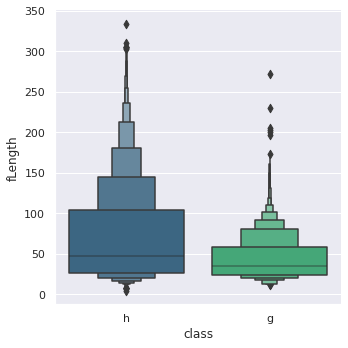

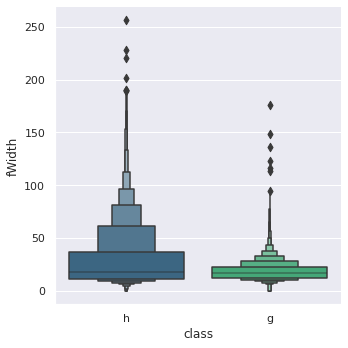

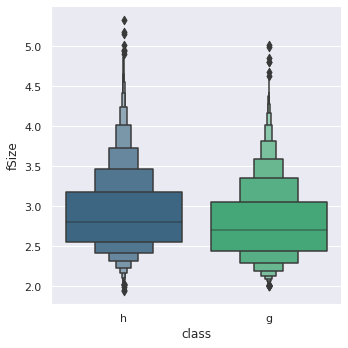

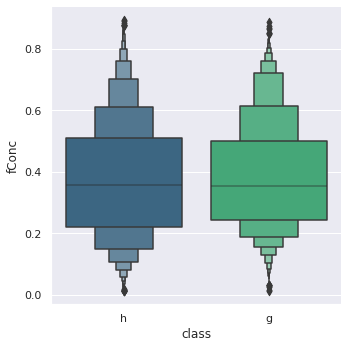

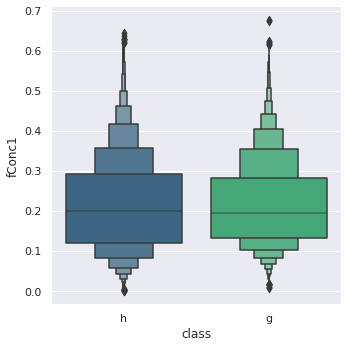

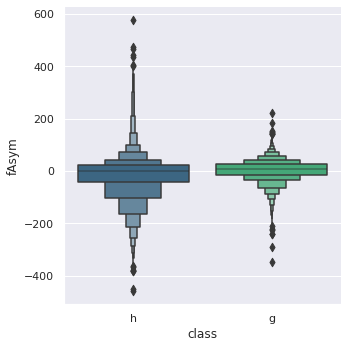

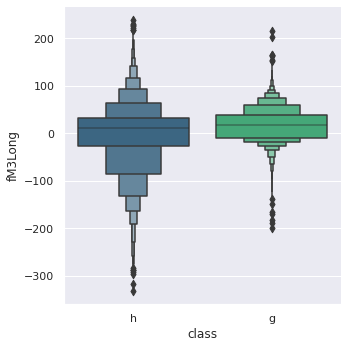

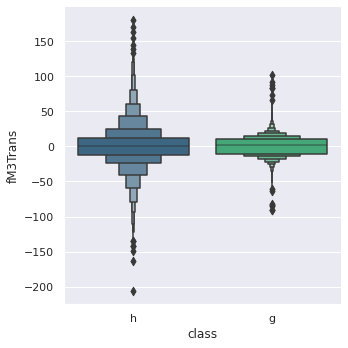

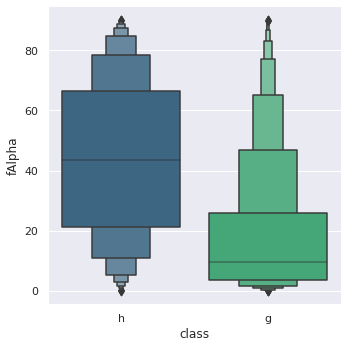

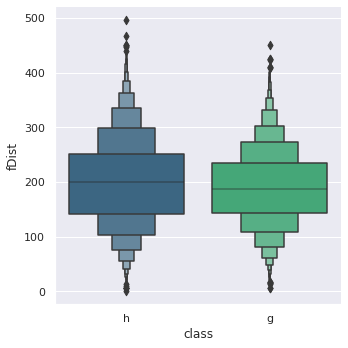

In [346]:
features = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long','fM3Trans', 'fAlpha', 'fDist']
sns.set_style("darkgrid")
for i,t in enumerate(features):
    sns.catplot(y=t, 
                x= "class",
                data=df_new, 
                orient='v', 
                ax=axes[i%2], 
                palette = "viridis",
                kind = 'boxen',
                order = ['h','g'],
                height = 5)
plt.show()

Histogram Plot of Data

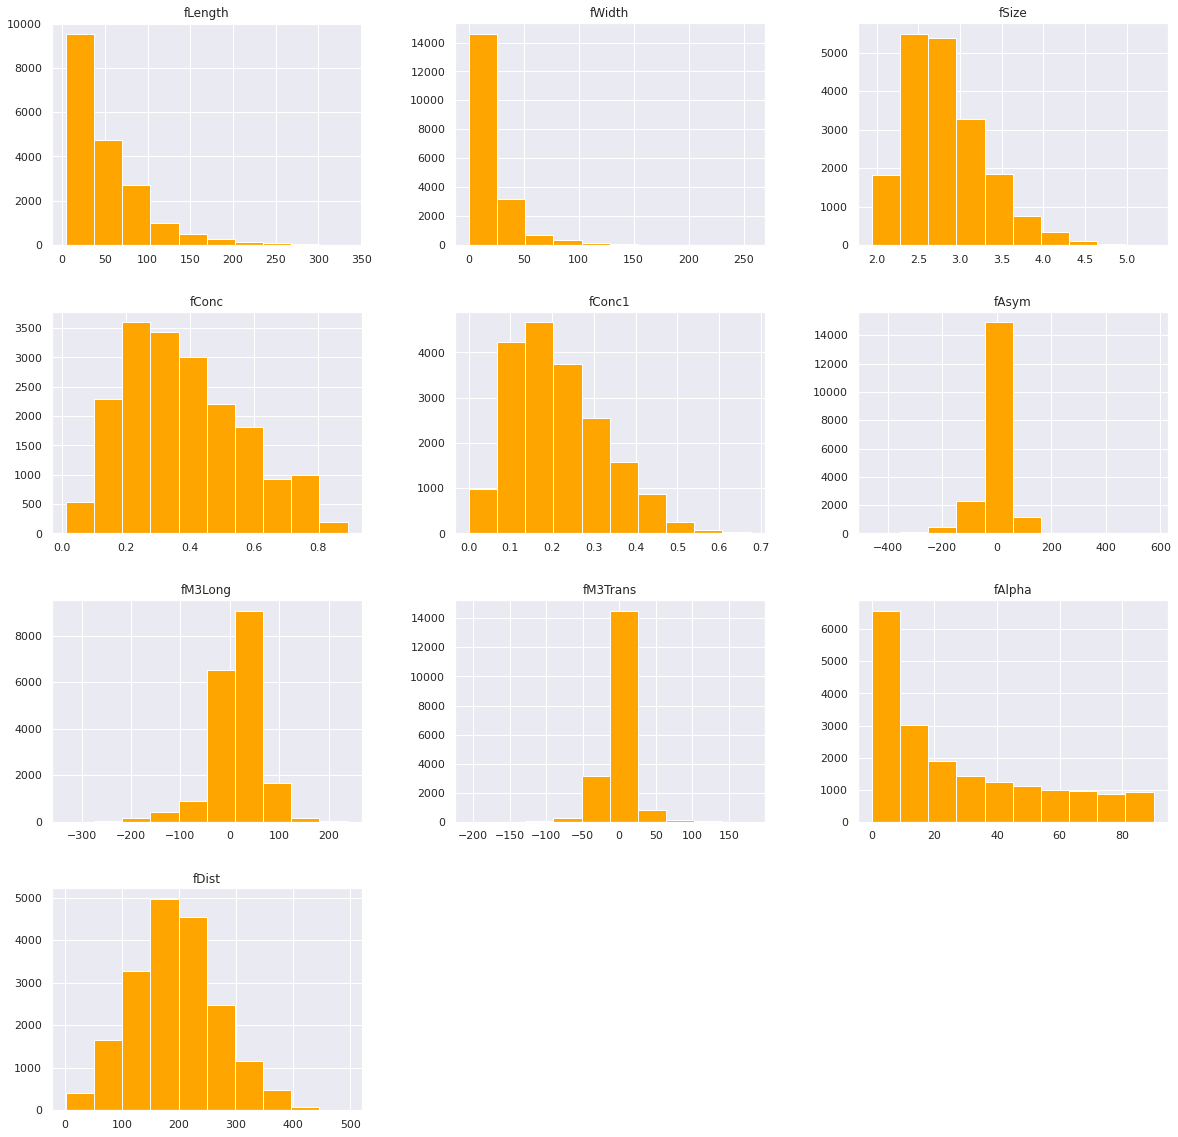

In [289]:
df_new.hist(bins = 10, figsize = (20,20), color='orange')
plt.show()

Distplot of Data

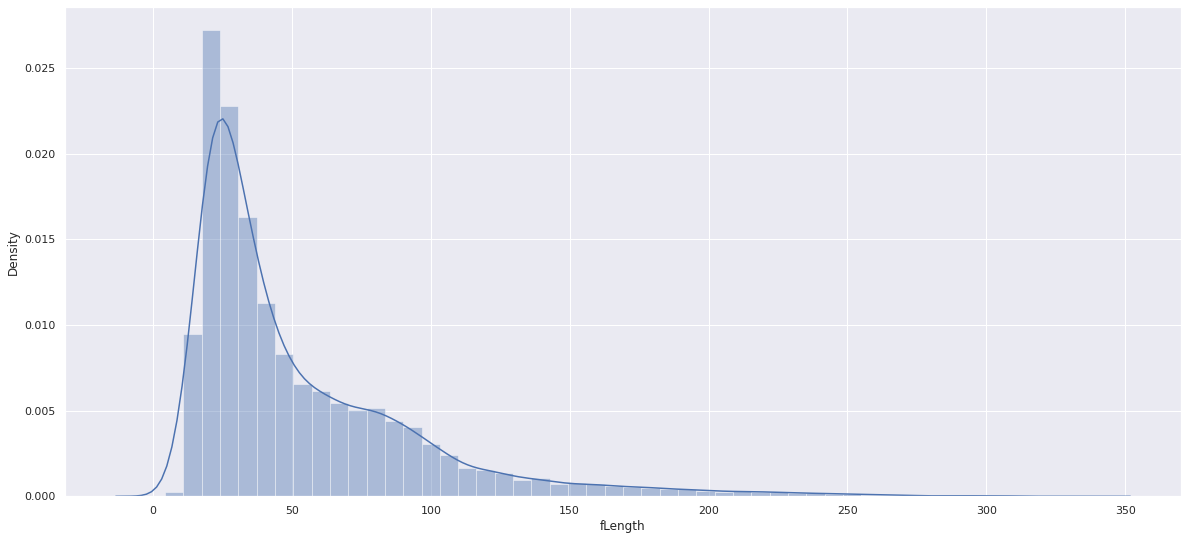

In [324]:
plt.rcParams['figure.figsize'] = (20, 9)
sns.distplot(df_new['fLength'])
plt.show()

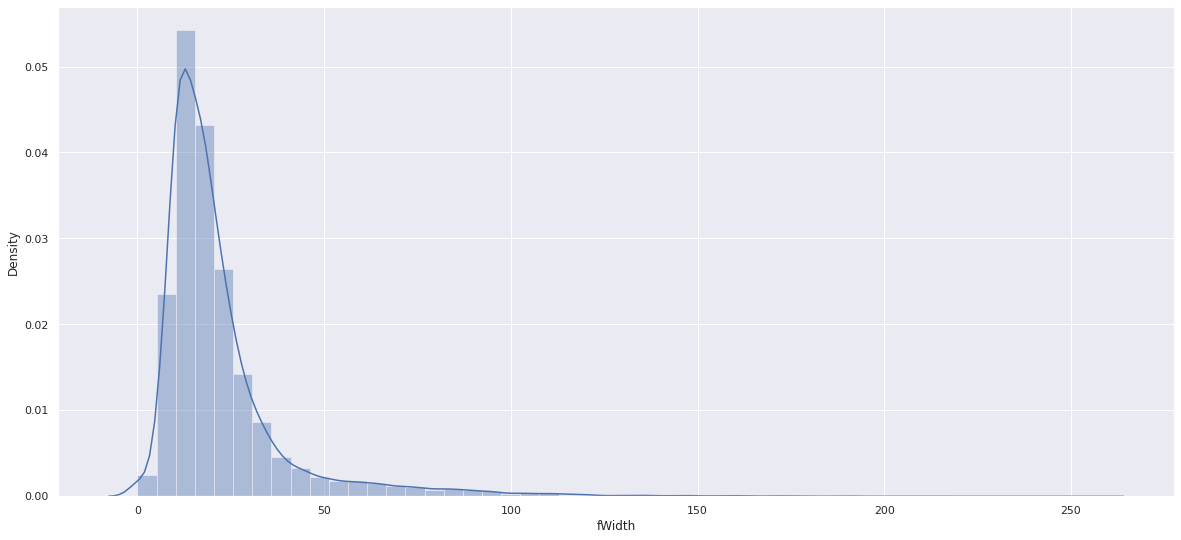

In [347]:
plt.rcParams['figure.figsize'] = (20, 9)
sns.distplot(df_new['fWidth'])
plt.show()

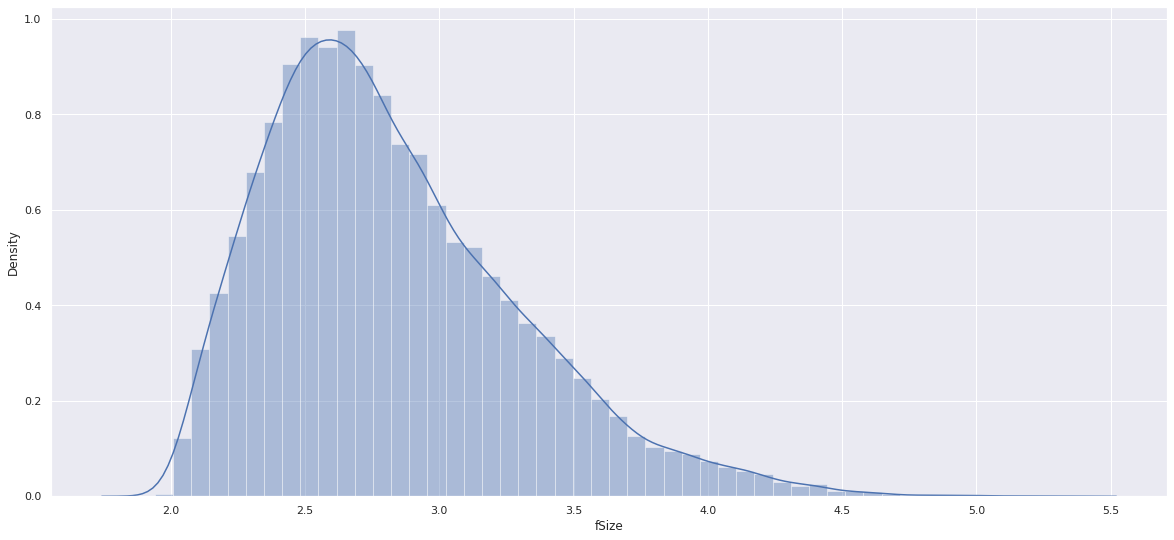

In [348]:
plt.rcParams['figure.figsize'] = (20, 9)
sns.distplot(df_new['fSize'])
plt.show()

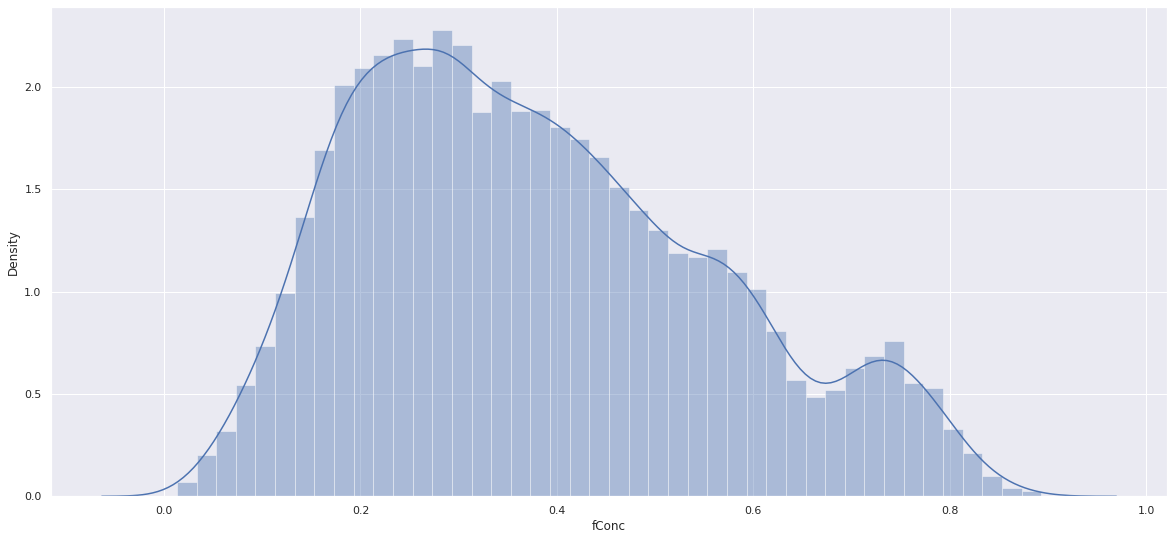

In [349]:
plt.rcParams['figure.figsize'] = (20, 9)
sns.distplot(df_new['fConc'])
plt.show()

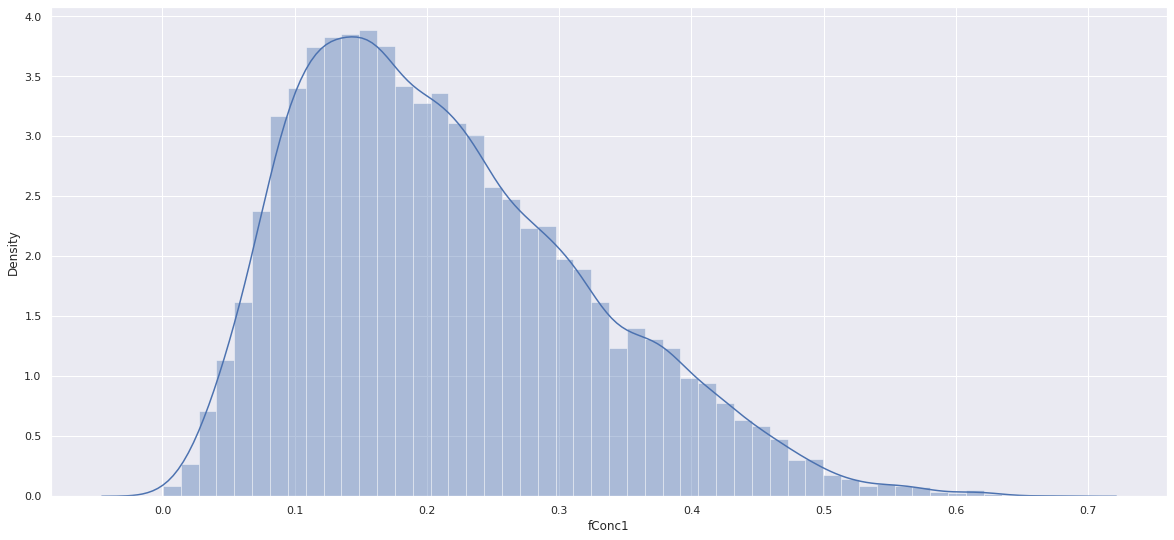

In [328]:
plt.rcParams['figure.figsize'] = (20, 9)
sns.distplot(df_new['fConc1'])
plt.show()

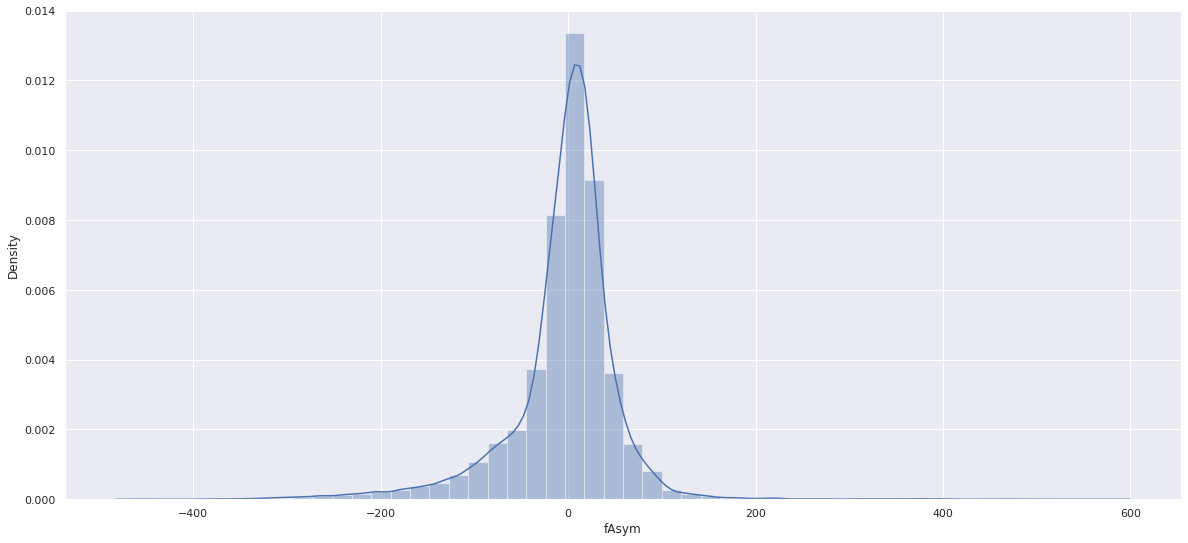

In [329]:
plt.rcParams['figure.figsize'] = (20, 9)
sns.distplot(df_new['fAsym'])
plt.show()

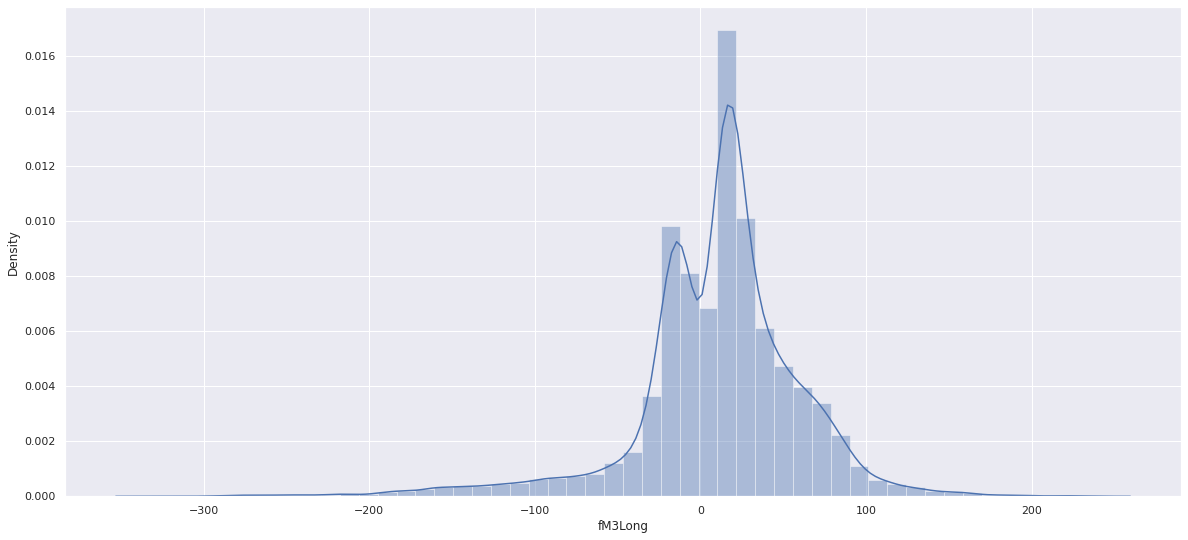

In [330]:
plt.rcParams['figure.figsize'] = (20, 9)
sns.distplot(df_new['fM3Long'])
plt.show()

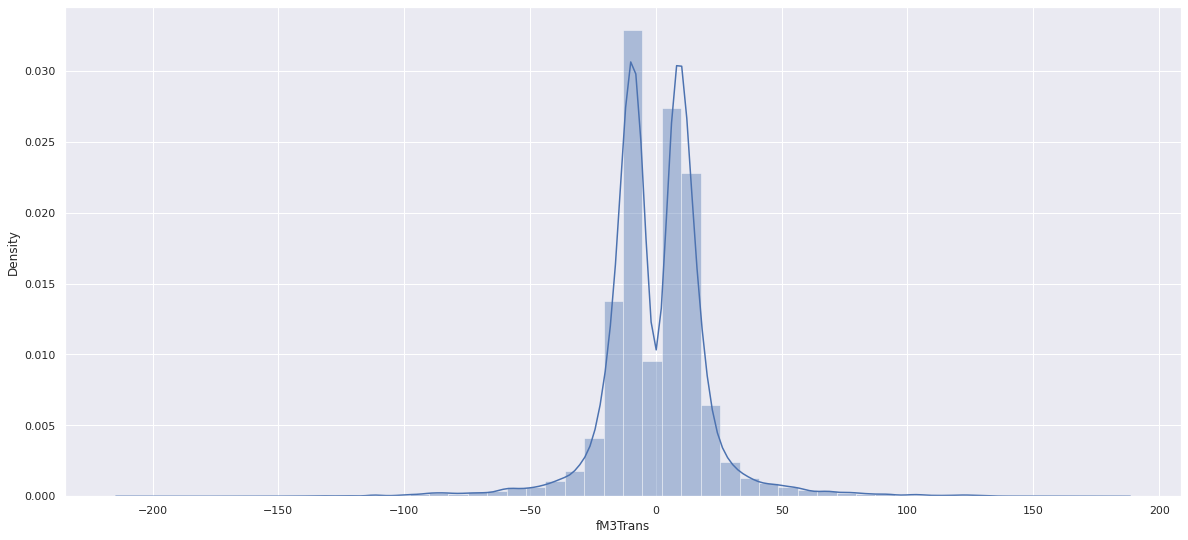

In [331]:
plt.rcParams['figure.figsize'] = (20, 9)
sns.distplot(df_new['fM3Trans'])
plt.show()

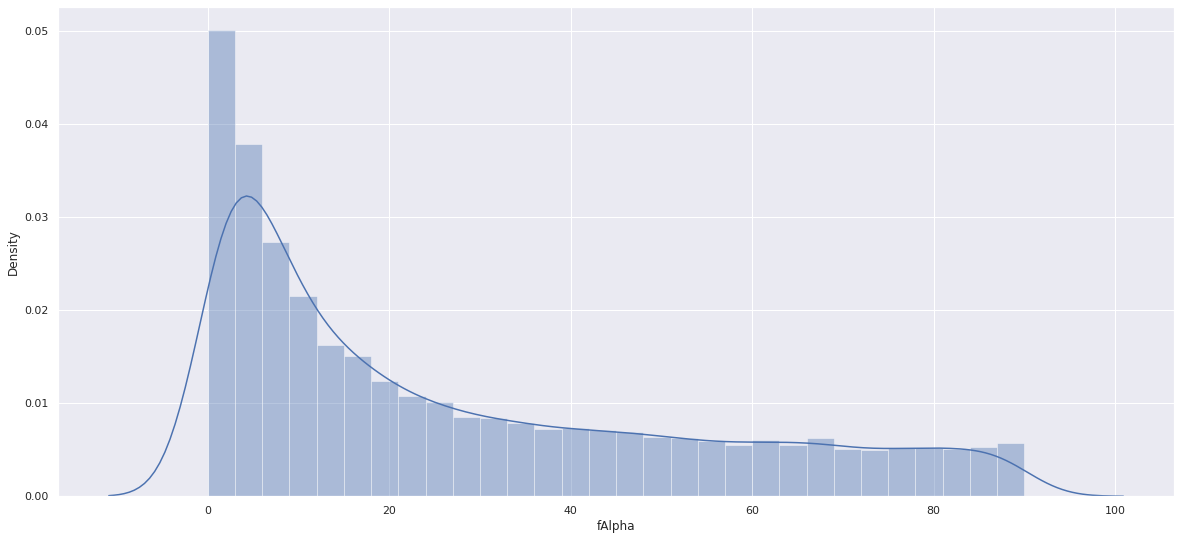

In [332]:
plt.rcParams['figure.figsize'] = (20, 9)
sns.distplot(df_new['fAlpha'])
plt.show()

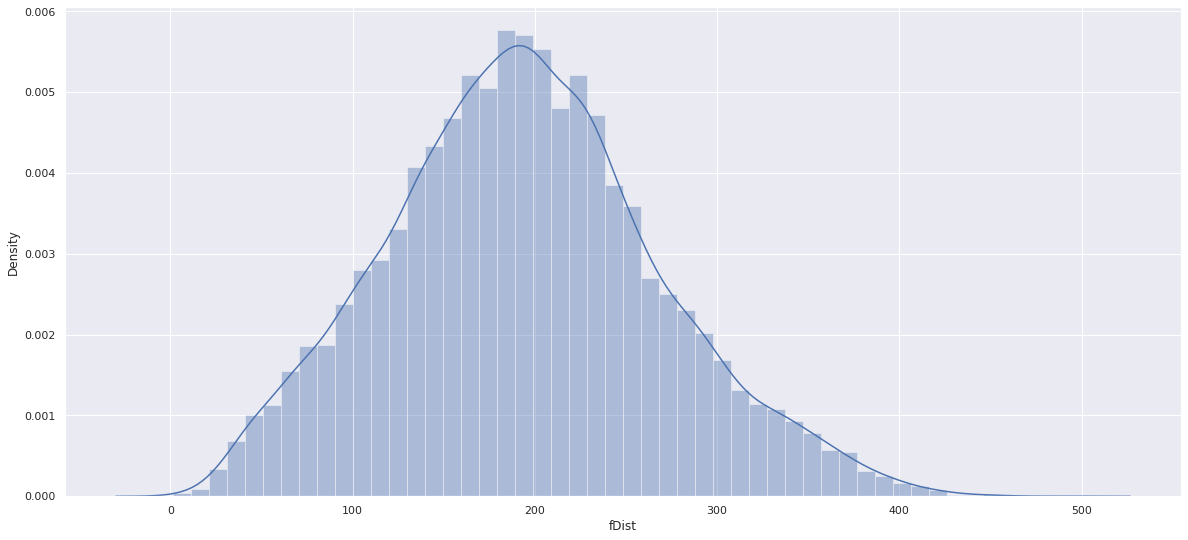

In [333]:
plt.rcParams['figure.figsize'] = (20, 9)
sns.distplot(df_new['fDist'])
plt.show()

Pairplot to visualize the Data

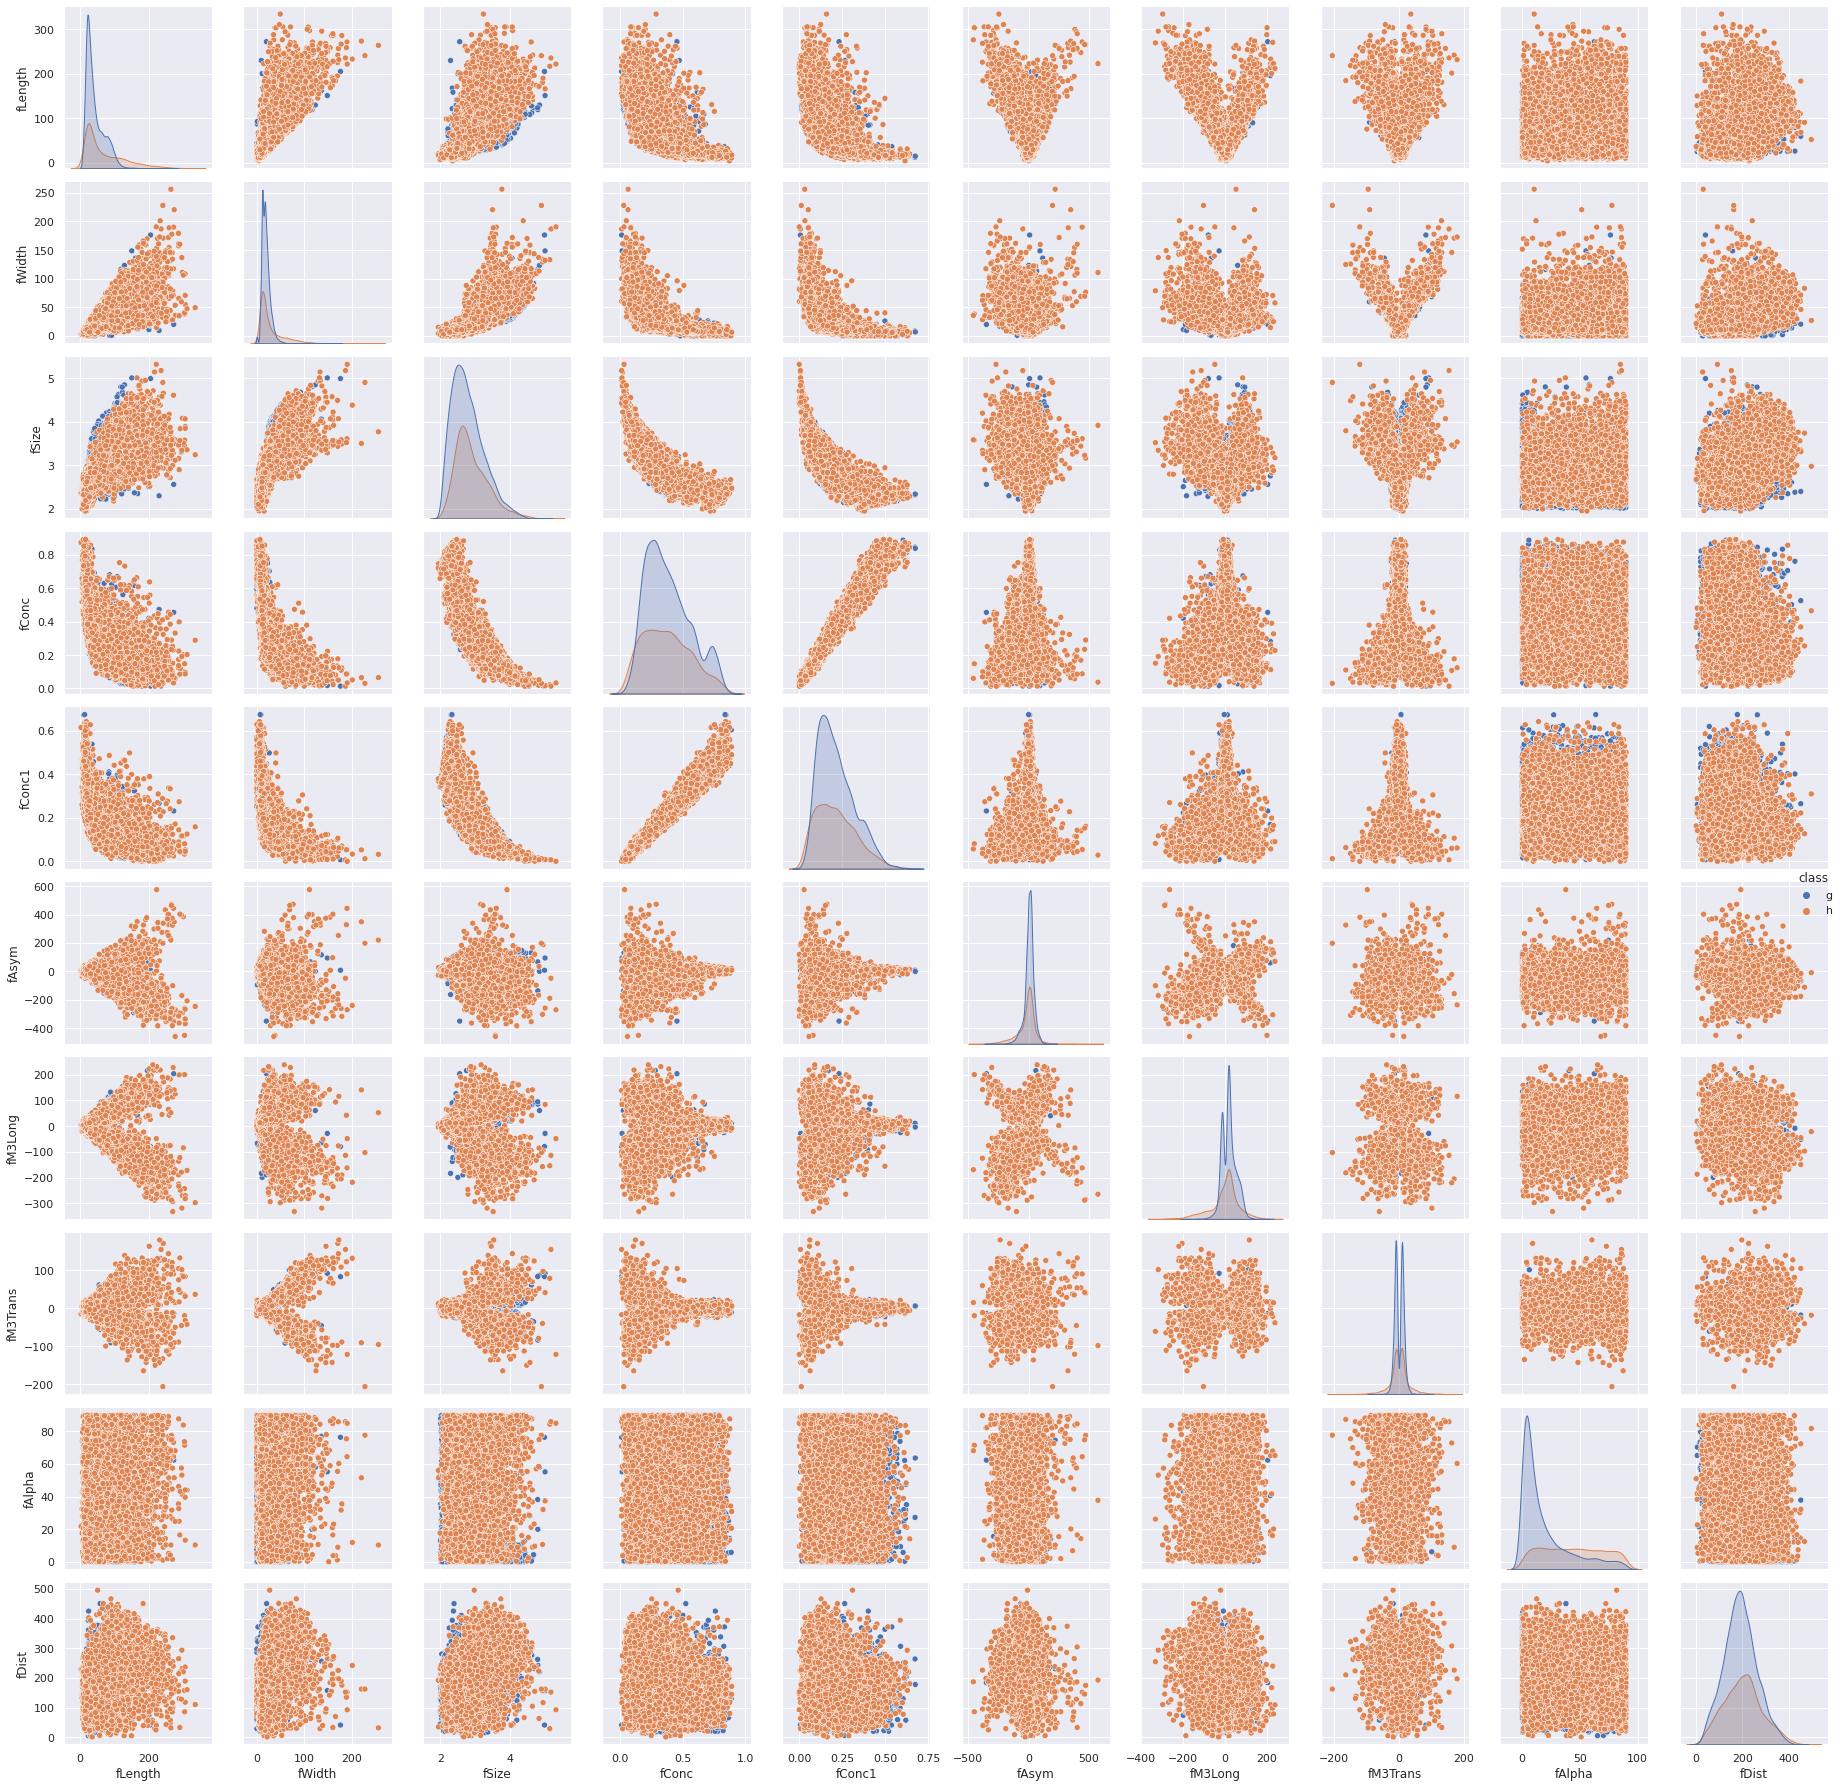

In [290]:
sns.pairplot(data=df_new,hue = 'class')
plt.tight_layout()
plt.show()

## Assigning the features,labels and performing Categorical Encoding

In [350]:
x = df_new.iloc[:,:-1].values
y = df_new.iloc[:,-1].values
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 ... 1 1 1]


Splitting the Dataset into Training and Testing

In [265]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 0)

## Feature Scaling

In [266]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Data Modeling

In [267]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

ann.compile(optimizer = 'adam',loss= 'binary_crossentropy',metrics = ['accuracy'])

In [249]:
history = ann.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 10,batch_size = 32)
     

Epoch 1/10
476/476 [==============================] - 3s 5ms/step - loss: 0.3651 - accuracy: 0.8452 - val_loss: 0.3426 - val_accuracy: 0.8549
Epoch 2/10
476/476 [==============================] - 2s 5ms/step - loss: 0.3248 - accuracy: 0.8643 - val_loss: 0.3194 - val_accuracy: 0.8662
Epoch 3/10
476/476 [==============================] - 2s 5ms/step - loss: 0.3155 - accuracy: 0.8686 - val_loss: 0.3214 - val_accuracy: 0.8628
Epoch 4/10
476/476 [==============================] - 2s 5ms/step - loss: 0.3103 - accuracy: 0.8711 - val_loss: 0.3220 - val_accuracy: 0.8615
Epoch 5/10
476/476 [==============================] - 2s 5ms/step - loss: 0.3020 - accuracy: 0.8762 - val_loss: 0.3102 - val_accuracy: 0.8720
Epoch 6/10
476/476 [==============================] - 2s 5ms/step - loss: 0.2976 - accuracy: 0.8776 - val_loss: 0.3117 - val_accuracy: 0.8693
Epoch 7/10
476/476 [==============================] - 2s 5ms/step - loss: 0.2918 - accuracy: 0.8783 - val_loss: 0.3165 - val_accuracy: 0.8722
Epoch 

## Visualizing the Results

Text(0.5, 0, 'epoch')

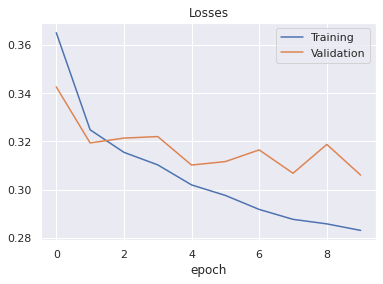

In [268]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Losses")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

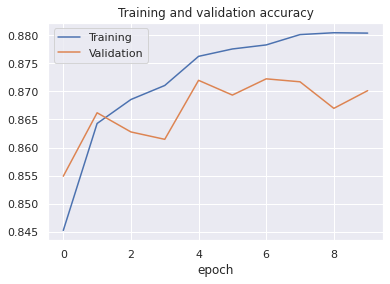

In [269]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')